# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
pd.set_option('display.max_column',None)
warnings.filterwarnings("ignore")

# Import Dataset

In [4]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
cred = {"username":"XXX","key":"XXX"}

In [6]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d parulpandey/palmer-archipelago-antarctica-penguin-data

  0% 0.00/11.3k [00:00<?, ?B/s]
100% 11.3k/11.3k [00:00<00:00, 18.1MB/s]


In [8]:
!unzip palmer-archipelago-antarctica-penguin-data.zip

Archive:  palmer-archipelago-antarctica-penguin-data.zip
  inflating: penguins_lter.csv       
  inflating: penguins_size.csv       


In [9]:
!ls -la

total 96
drwxr-xr-x 1 root root  4096 May 23 04:45 .
drwxr-xr-x 1 root root  4096 May 23 04:43 ..
drwxr-xr-x 4 root root  4096 May 19 13:31 .config
-rw-r--r-- 1 root root 11558 May 23 04:45 palmer-archipelago-antarctica-penguin-data.zip
-rw-r--r-- 1 root root 50914 Jun  9  2020 penguins_lter.csv
-rw-r--r-- 1 root root 13519 Jun  9  2020 penguins_size.csv
drwxr-xr-x 1 root root  4096 May 19 13:32 sample_data


In [10]:
df = pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [11]:
print('Row length : '+ str(df.shape[0]))
print('Column length : '+ str(df.shape[1]))

Row length : 344
Column length : 7


# Exploratory Data Analysis

## Data Description
1. species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
2. culmen_length_mm: culmen length (mm) (panjang paruh)<br>
3. culmen_depth_mm: culmen depth (mm) (lebar paruh)<br>
4. flipper_length_mm: flipper length (mm) (panjang sayap)<br>
5. body_mass_g: body mass (g)<br>
6. island: island name (Dream, Torgersen, or Biscoe) in the Palmer and Archipelago in Antarctica<br>
7. sex: penguin gender<br>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
df.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

# Data Preprocessing

## Correcting Invalid Column Value

In [15]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [16]:
df['sex'] = df['sex'].replace(['.'], df['sex'].mode()[0])

In [17]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [18]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [19]:
df.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

## Handle Missing Value Based On Their Species

In [20]:
df.isna().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [21]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df.groupby('species')['culmen_length_mm'].transform('mean'))

In [22]:
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df.groupby('species')['culmen_depth_mm'].transform('mean'))

In [23]:
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df.groupby('species')['flipper_length_mm'].transform('mean'))

In [24]:
df['body_mass_g'] = df['body_mass_g'].fillna(df.groupby('species')['body_mass_g'].transform('mean'))

In [25]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [26]:
df.shape[0]

344

# Feature Visualization

In [27]:
# Function to Plot DF Features
def plot_visualize(df,start_index):
  while start_index < len(df.columns)-1:
    sns.set_style("whitegrid")
    sns.distplot(df[df.columns[start_index]])
    plt.show()
    start_index+=1

## Data Visualization

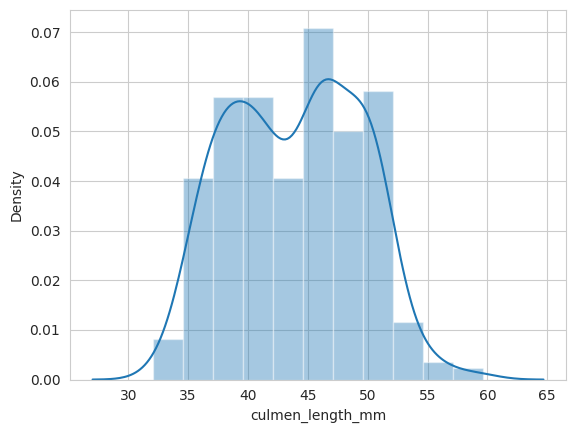

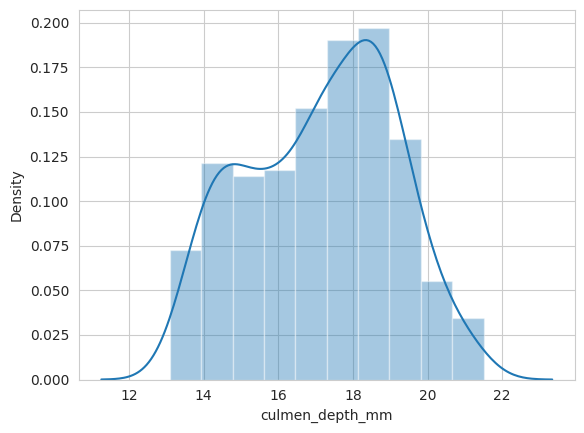

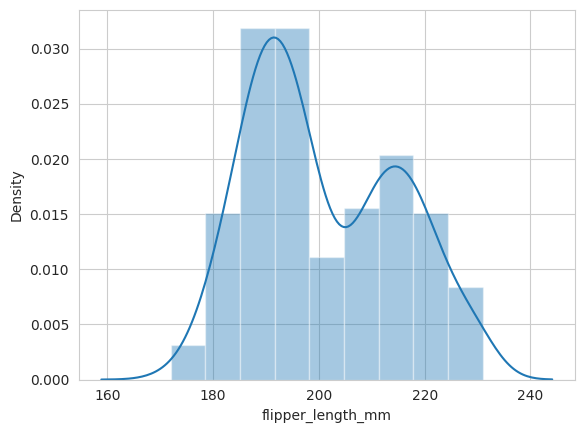

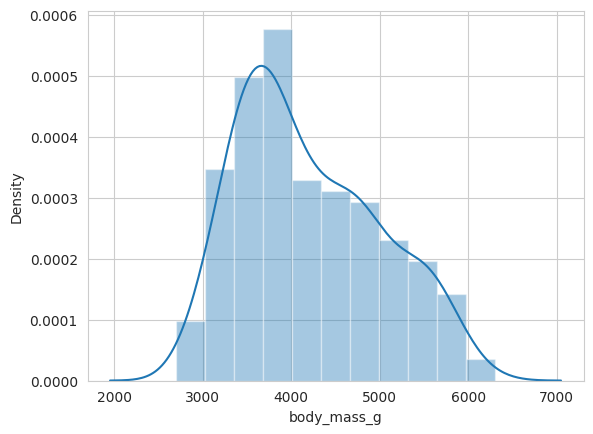

In [28]:
plot_visualize(df,2)

<Axes: >

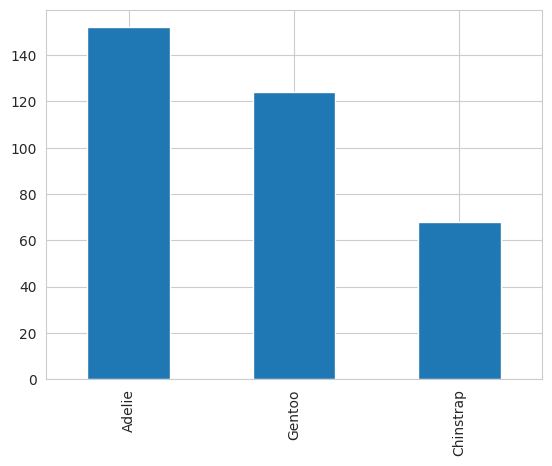

In [29]:
df['species'].value_counts().plot(kind='bar')

Species columns are imbalance

<Axes: >

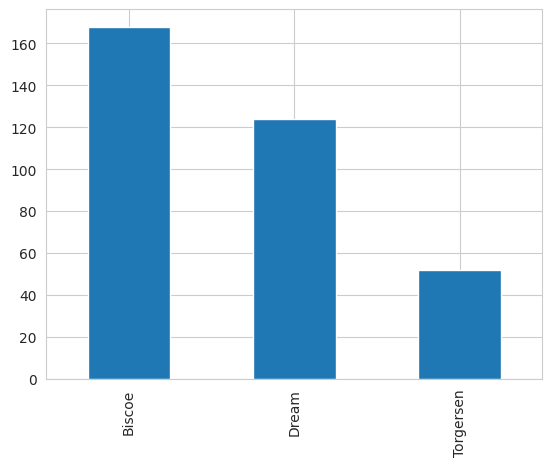

In [30]:
df['island'].value_counts().plot(kind='bar')

<Axes: >

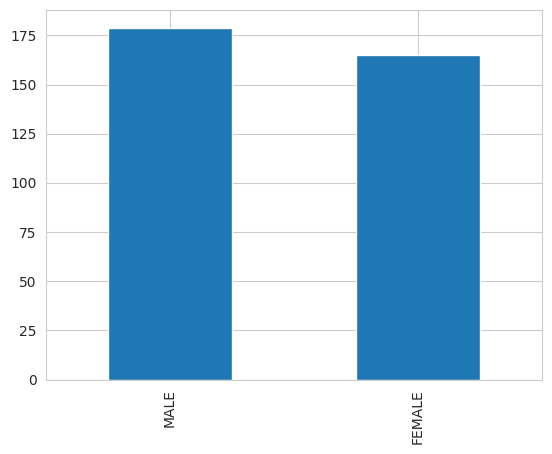

In [31]:
df['sex'].value_counts().plot(kind='bar')

## Outliers Check

[Text(0.5, 1.0, 'culmen_length_mm')]

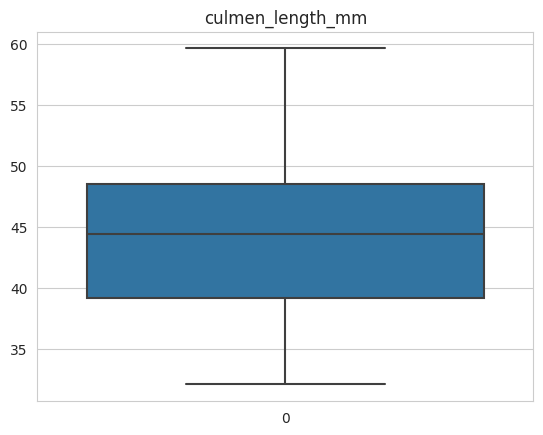

In [36]:
sns.boxplot(data=df['culmen_length_mm'],orient='v').set(title='culmen_length_mm')

[Text(0.5, 1.0, 'culmen_depth_mm')]

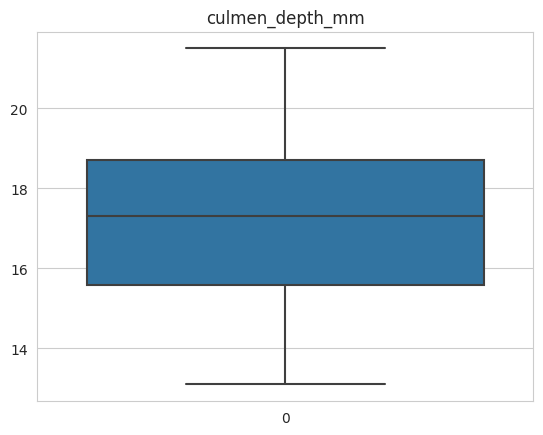

In [33]:
sns.boxplot(data=df['culmen_depth_mm'],orient='v').set(title='culmen_depth_mm')

[Text(0.5, 1.0, 'flipper_length_mm')]

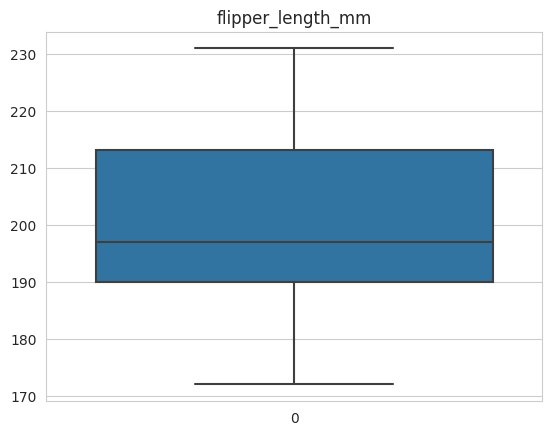

In [34]:
sns.boxplot(data=df['flipper_length_mm'],orient='v').set(title='flipper_length_mm')

[Text(0.5, 1.0, 'body_mass_g')]

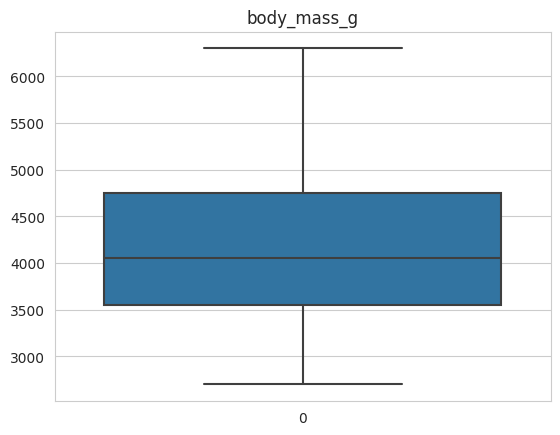

In [35]:
sns.boxplot(data=df['body_mass_g'],orient='v').set(title='body_mass_g')

# Encode Categorical Data

## Encoding Label For Species

In [37]:
df['species']=df['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

## One Hot Encoder for Other Categorial Columns

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False) 

categorical_cols = ['island','sex'] 

array_hot_encoded = ohe.fit_transform(df[categorical_cols])
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)
data_hot_encoded.columns = ohe.get_feature_names_out(categorical_cols)
data_other_cols = df.drop(columns=categorical_cols)

df = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [39]:
df

,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.0,0.0,1.0,0.0,1.0,0,39.100000,18.700000,181.000000,3750.000000
1,0.0,0.0,1.0,1.0,0.0,0,39.500000,17.400000,186.000000,3800.000000
2,0.0,0.0,1.0,1.0,0.0,0,40.300000,18.000000,195.000000,3250.000000
3,0.0,0.0,1.0,0.0,1.0,0,38.791391,18.346358,189.953642,3700.662252
4,0.0,0.0,1.0,1.0,0.0,0,36.700000,19.300000,193.000000,3450.000000
...,...,...,...,...,...,...,...,...,...,...
339,1.0,0.0,0.0,0.0,1.0,1,47.504878,14.982114,217.186992,5076.016260
340,1.0,0.0,0.0,1.0,0.0,1,46.800000,14.300000,215.000000,4850.000000
341,1.0,0.0,0.0,0.0,1.0,1,50.400000,15.700000,222.000000,5750.000000
342,1.0,0.0,0.0,1.0,0.0,1,45.200000,14.800000,212.000000,5200.000000


# Feature Engineering with Matrix Correlation

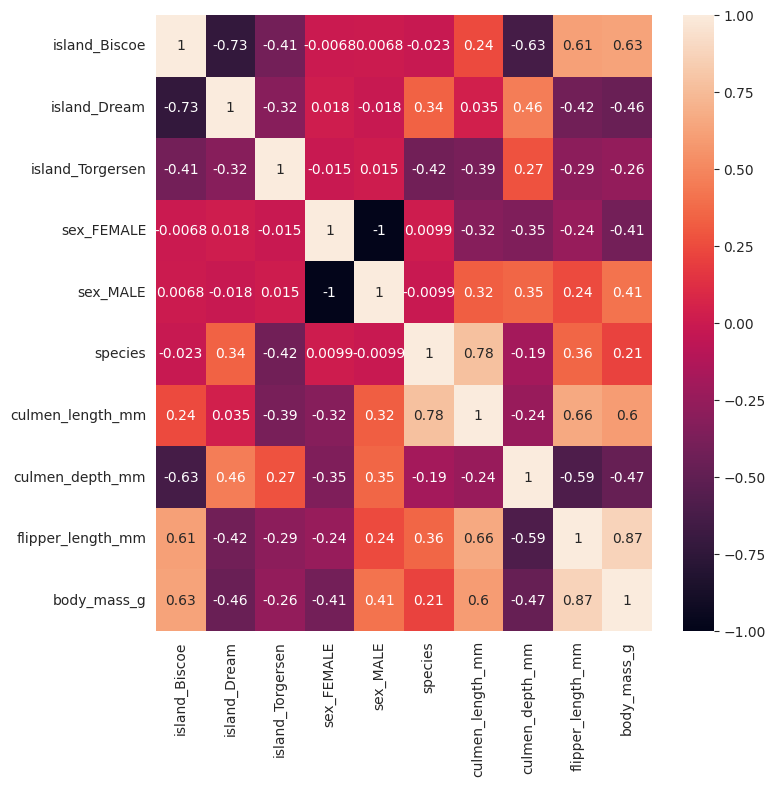

In [40]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

plt.show()

# Split Dataset

## Splitting Dependant and Independant Variable

In [41]:
y = df[['species']]
x = df.drop(['species'],axis=1)

In [42]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
339,1
340,1
341,1
342,1


## Splitting Train and Test Dataset

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

# Data Standardization

If we look to the initial DataFrame, bodymass have a thousand (ribuan) scale, but culment length only on tens scale (puluhan), so we standardizing the value, refactoring our data to mean of zero 

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_test=sc.fit_transform(X_test)

# Accuracy Before Handling Imbalance

KNN

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

In [47]:
accuracy_score(Y_test,Y_pred)

1.0

Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)

In [49]:
accuracy_score(Y_test,Y_pred)

1.0

Adaptive Boosting

In [50]:
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(n_estimators=100, random_state=0)
adaclf.fit(X_train,Y_train)
Y_pred = adaclf.predict(X_test)

In [51]:
accuracy_score(Y_test,Y_pred)

0.7536231884057971

Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
grb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
grb.fit(X_train, Y_train)
Y_pred = grb.predict(X_test)

In [53]:
accuracy_score(Y_test,Y_pred)

1.0

Voting Method

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Initialize individual classifiers
clf1 = KNeighborsClassifier(n_neighbors=6)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = GaussianNB()

In [55]:
from sklearn.ensemble import VotingClassifier

# Create ensemble classifier using voting method
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('gnb', clf3)], voting='hard')

# Train the ensemble classifier
voting_clf.fit(X_train, Y_train)

# Make predictions on testing set
Y_pred_voting = voting_clf.predict(X_test)

In [56]:
accuracy_score(Y_test,Y_pred_voting)

1.0

# Handle Imbalance with SMOTE

In [57]:
! pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Data size before oversampling

In [58]:
print(X_train.shape[0])
print(Y_train.shape[0])
print(X_test.shape[0])
print(Y_test.shape[0])

275
275
69
69


In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, Y_train = sm.fit_resample(X_train, Y_train)

Data size after oversampling

In [60]:
print(X_train.shape[0])
print(Y_train.shape[0])
print(X_test.shape[0])
print(Y_test.shape[0])

372
372
69
69


We choose oversampling technique because since the dataset size is small, we'll lost much information if we do undersampling

# Accuracy After Handling Imbalance

KNN

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

In [62]:
accuracy_score(Y_test,Y_pred)

1.0

Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)

In [64]:
accuracy_score(Y_test,Y_pred)

1.0

Adaptive Boosting

In [65]:
from sklearn.ensemble import AdaBoostClassifier
adaclf = AdaBoostClassifier(n_estimators=100, random_state=0)
adaclf.fit(X_train,Y_train)
Y_pred = adaclf.predict(X_test)

In [66]:
accuracy_score(Y_test,Y_pred)

0.7536231884057971

Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
grb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
grb.fit(X_train, Y_train)
Y_pred = grb.predict(X_test)

In [68]:
accuracy_score(Y_test,Y_pred)

1.0

Voting Method

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Initialize individual classifiers
clf1 = KNeighborsClassifier(n_neighbors=6)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = GaussianNB()

In [70]:
from sklearn.ensemble import VotingClassifier

# Create ensemble classifier using voting method
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('gnb', clf3)], voting='hard')

# Train the ensemble classifier
voting_clf.fit(X_train, Y_train)

# Make predictions on testing set
Y_pred_voting = voting_clf.predict(X_test)

In [71]:
accuracy_score(Y_test,Y_pred_voting)

1.0

# Report

Based on the result before after those prediction, Ensemble Learning (Random Forest) is the most stable predictor while having high accuracy too <br>

All ensemble result learning method are stable compared to single learning (KNN). KNN after resample shows increase of accuracy, but since the result of prediction up to 100%, it may lead to overfitting since prediction impossible to reach 100% of accuracy


The reason why GradientBoost perform better than AdaBoost in this prediction is AdaBoost can't capture more relationship on the species variable (dependent variable) because we using lable encoding, not one hot encoding since the Gradient Boost is more general algorithm. <br>